# Heart Diease Classification

## Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
#from timeit import default_timer as timer
#from datetime import timedelta

In [ ]:
heart = pd.read_csv("/content/heart.csv")

*   Age : Age of the patient
*   Sex : Sex of the patient
*   Lexang: exercise induced angina (1 = yes; 0 = no)
*   ca: number of major vessels (0-3)

*   cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
*   trtbps : resting blood pressure (in mm Hg)
*   chol : cholestoral in mg/dl fetched via BMI sensor
*   fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
for i in heart.columns:
  print(i,"unique value:")
  print("=>", heart[i].unique())
  

age unique value:
=> [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex unique value:
=> [1 0]
cp unique value:
=> [3 2 1 0]
trestbps unique value:
=> [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol unique value:
=> [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 

In [ ]:
categorical_columns = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

## EDA

***

## Data Engineering

In [ ]:
y = heart.target
X = heart.drop(["target"], axis = 1)

### One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

In [ ]:
non_categorical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
ohe_dataset = ohe.fit_transform(heart[categorical_columns])
columns_ohe = ohe.get_feature_names(input_features = heart[categorical_columns].columns)
ohe_dataset = pd.DataFrame(ohe_dataset.toarray())
ohe_dataset.columns = columns_ohe
X_OH = pd.concat([X.drop(categorical_columns,axis = 1),ohe_dataset],axis = 1)

In [ ]:
# One Hot Encoding
X_OH.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,130,250,187,3.5,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,130,204,172,1.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56,120,236,178,0.8,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,57,120,354,163,0.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

min_heart = X_OH.min()
max_heart = X_OH.max()

X_normalized = scaler.fit_transform(X_OH)

X_normalized = pd.DataFrame(X_normalized)

X_normalized.columns = X_OH.columns

In [ ]:
X_normalized.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

min_heart = X_OH.min()
max_heart = X_OH.max()

X_std = scaler.fit_transform(X_OH)

X_std = pd.DataFrame(X_std)

X_std.columns = X_OH.columns

In [ ]:
X_std.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0.681005,-0.444554,-0.634648,3.489114,2.394438,-1.003306,-0.115663,-0.696631,-0.926766,-0.939142,-0.522599,-0.378677,-0.265841,-0.129532,3.979112,-1.100763,-0.793116
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0.681005,-0.444554,1.575677,-0.286606,-0.417635,0.996705,-0.115663,-0.696631,-0.926766,-0.939142,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-1.468418,2.249444,-0.634648,-0.286606,-0.417635,-1.003306,-0.115663,-0.696631,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.681005,2.249444,-0.634648,-0.286606,-0.417635,0.996705,-0.115663,-0.696631,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,-1.468418,-0.444554,-0.634648,-0.286606,-0.417635,0.996705,-0.115663,1.435481,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116


### Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, 
    y, 
    test_size=0.2,  
    random_state=629) 

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X, 
    y, 
    test_size=0.2,  
    random_state=629) 

# Binary Classifers

In [ ]:
from sklearn import metrics

## DNN

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
val_acc_threshold = 0.93
acc_threshold = 0.95

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if((logs.get('accuracy') > acc_threshold) & (logs.get('val_accuracy') > val_acc_threshold)):    
          print("Reached  val_accuracy, so stopping training!!".format(acc_threshold))
          self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(256,activation = "relu",kernel_regularizer=regularizers.l2(l2=1e-2)),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dense(128,activation = "relu",kernel_regularizer=regularizers.l2(l2=1e-2)),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dense(64,activation = "relu",kernel_regularizer=regularizers.l2(l2=1e-2)),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dense(16,activation = "relu",kernel_regularizer=regularizers.l2(l2=1e-2)),
                          keras.layers.BatchNormalization(),
                          keras.layers.Dense(1,activation="sigmoid")
                          ])
## Callback
  

adam_opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam_opt,loss = 'binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train,
                    y_train,
                    epochs=300,
                    verbose=1,
                    validation_data = (X_test,y_test),
                    callbacks=[callbacks])

Epoch 1/300
8/8 [==============================] - 3s 94ms/step - loss: 4.0345 - accuracy: 0.4910 - val_loss: 3.8031 - val_accuracy: 0.8852
Epoch 2/300
8/8 [==============================] - 0s 11ms/step - loss: 3.5083 - accuracy: 0.8528 - val_loss: 3.7028 - val_accuracy: 0.8852
Epoch 3/300
8/8 [==============================] - 0s 11ms/step - loss: 3.3951 - accuracy: 0.9165 - val_loss: 3.6095 - val_accuracy: 0.8197
Epoch 4/300
8/8 [==============================] - 0s 11ms/step - loss: 3.2483 - accuracy: 0.9260 - val_loss: 3.5190 - val_accuracy: 0.8033
Epoch 5/300
8/8 [==============================] - 0s 10ms/step - loss: 3.1195 - accuracy: 0.9479 - val_loss: 3.4342 - val_accuracy: 0.7869
Epoch 6/300
8/8 [==============================] - 0s 11ms/step - loss: 2.9889 - accuracy: 0.9787 - val_loss: 3.3443 - val_accuracy: 0.7541
Epoch 7/300
8/8 [==============================] - 0s 11ms/step - loss: 2.8597 - accuracy: 0.9919 - val_loss: 3.2520 - val_accuracy: 0.7377
Epoch 8/300
8/8 [===

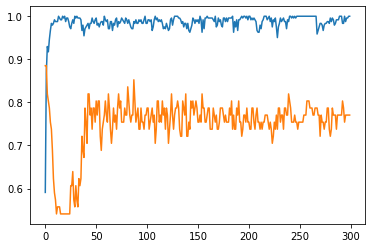

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [ ]:
y_dnn_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_dnn_pred = np.squeeze(y_dnn_pred)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_dnn_pred))

Accuracy: 0.7704918032786885


## Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_estimator_)

In [ ]:
clf = svm.SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_svm_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_svm_pred))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#param_grid = {'max_depth': [80, 90, 100, 110],
#              'min_samples_leaf': [3, 4, 5],
#              'min_samples_split': [8, 10, 12],
#              'n_estimators': [100, 200, 300, 1000]}

In [ ]:
#grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2)
#grid.fit(X,y)

In [ ]:
#print(grid.best_estimator_)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train_tree, y_train_tree)

In [ ]:
y_rf_pred = clf.predict(X_test_tree)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_tree, y_rf_pred))

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_ada_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_ada_pred))

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_gb_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_gb_pred))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_logistic_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_logistic_pred))

In [ ]:
# To Do List
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import confusion_matrix

## Gaussian Naive Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
  
y_Gaussian_pred = clf.predict(X_test)

print("Accuracy of Gaussian Naive Bayes:", round(metrics.accuracy_score(y_test, y_Gaussian_pred),3))

## Bernoulli Naive Bayes

In [ ]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
  
y_Bernoulli_pred = clf.predict(X_test)
  
print("The accuracy of Bernoulli Naive Bayes: ", round(metrics.accuracy_score(y_test, y_Bernoulli_pred),3))

## K Nearest Neighbours

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 1)  
clf.fit(X_train, y_train)

y_KNeighbors_pred = model.predict(X_test).round()

print("The accuracy of K Nearest Neighbours : ", round(metrics.accuracy_score(y_test, y_KNeighbors_pred),3))

# Summary

In [ ]:
names = ["Deep Neural Network", "Support Vector Machine", "Random Forest", "Adaboost","Gradient Boost","Logistic Regression",
         "Gaussian Naive Bayes", "Bernoulli Naive Bayes","K Nearest Neighbours"]

predictions = [y_dnn_pred, y_svm_pred, y_rf_pred, y_ada_pred, y_gb_pred, y_logistic_pred, y_Gaussian_pred,
               y_Bernoulli_pred, y_KNeighbors_pred]

acc_list = []
for i in range(len(names)):
  score = metrics.accuracy_score(y_test,predictions[i])
  print("Accuracy of",names[i], ":", round(score,3))
  acc_list.append(score)

index_max = np.argmax(acc_list)
print("\n")
print("The best model is << {0} >> with accuracy:{1}".format(names[index_max],round(acc_list[index_max],3)))

In [ ]:
#error_rate = []
#  
#for i in range(1, 40):
#      
#    model = KNeighborsClassifier(n_neighbors = i)
#    model.fit(x_train, y_train)
#    pred_i = model.predict(x_test)
#    error_rate.append(np.mean(pred_i != y_test))
  
#plt.figure(figsize =(10, 6))
#plt.plot(range(1, 40), error_rate, color ='blue',
#                linestyle ='dashed', marker ='o',
#         markerfacecolor ='red', markersize = 10)
  
#plt.title('Error Rate vs. K Value')
#plt.xlabel('K')
#plt.ylabel('Error Rate')